In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Business Objective:

Generate the features from the dataset and use them to recommend the

books accordingly to the users.

In [2]:
#bk = pd.read_csv("/content/Books.csv", sep=",",error_bad_lines=False)
#rt = pd.read_csv("/content/Ratings.csv")
#user = pd.read_csv("/content/Users.csv")

user = pd.read_csv("D:/Shiva Data Science/Project-02/Users.csv")
bk = pd.read_csv("D:/Shiva Data Science/Project-02/Books.csv")
rt = pd.read_csv("D:/Shiva Data Science/Project-02/Ratings.csv")

In [3]:
bk.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
rt.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Dimension of dataset

In [6]:
bk.shape

(271360, 8)

In [7]:
rt.shape

(1149780, 3)

In [8]:
user.shape

(278858, 3)

EDA

In [9]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
bk.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [13]:
rt.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [14]:
user.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [15]:
bk.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [16]:
rt.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [17]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

From user dataset age column is having maximum missing values

In [18]:
bk.duplicated().sum()

0

In [19]:
rt.duplicated().sum()

0

In [20]:
user.duplicated().sum()

0

No duplicate values in three datasets

# Data cleaning

Book dataset

In [21]:
# nan values in particular column
bk.loc[(bk['Book-Author'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


here Book-Author is with nan/missing value

In [22]:
# nan values from Publisher column
bk.loc[(bk['Publisher'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


Here Publisher is with nan/missing values

In [23]:
# getting unique value from 'year_of_publication' feature
bk['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [24]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
bk[bk['Year-Of-Publication'] == 0]
#bk[bk['Year-Of-Publication'] == 'nan']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


4618 rows with zero values as year of publication


 Extracting and fixing mismatch in feature year-of-publication column

In [25]:
# Replace 'Year-Of-Publication' values equal to 0 with a new value (e.g., 2023)
new_value = 2023
bk.loc[bk['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = new_value


In [26]:
print(bk['Year-Of-Publication']==0)  # Here fixed year-of-publication with new value

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Name: Year-Of-Publication, Length: 271360, dtype: bool


In [27]:
# Check for NaN values in the 'Year-Of-Publication' column
is_nan = pd.isna(bk['Year-Of-Publication'])
print(is_nan)

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Name: Year-Of-Publication, Length: 271360, dtype: bool


Extracting and fixing mismatch in feature

There has to make some correction in three rows as you can see in above output.

In [28]:
bk.index

RangeIndex(start=0, stop=271360, step=1)

In [29]:
#bk.loc[221678]

In [30]:
#bk.loc[209538]

In [31]:
#bk.loc[220731]

Let's fix it and make it in correct format as per our dataset.

In [32]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [33]:
replace_df_value(bk, 209538, 'Book-Title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(bk, 209538, 'Book-Author', 'Michael Teitelbaum')
replace_df_value(bk, 209538, 'Year-Of-Publication', 2000)
replace_df_value(bk, 209538, 'Publisher', 'DK Publishing Inc')

replace_df_value(bk, 221678, 'Book-Title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(bk, 221678, 'Book-Author', 'James Buckley')
replace_df_value(bk, 221678, 'Year-Of-Publication', 2000)
replace_df_value(bk, 221678, 'Publisher', 'DK Publishing Inc')

replace_df_value(bk, 220731,'Book-Title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(bk, 220731, 'Book-Author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(bk, 220731, 'Year-Of-Publication', 2003)
replace_df_value(bk, 220731, 'Publisher', 'Gallimard')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [34]:
bk.loc[221678]

ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                James Buckley
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object

In [35]:
bk.loc[209538]

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                           Michael Teitelbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [36]:
bk.loc[220731]

ISBN                                                          2070426769
Book-Title                         Peuple du ciel, suivi de 'Les Bergers
Book-Author                              Jean-Marie Gustave Le ClÃ?Â©zio
Year-Of-Publication                                                 2003
Publisher                                                      Gallimard
Image-URL-S            http://images.amazon.com/images/P/2070426769.0...
Image-URL-M            http://images.amazon.com/images/P/2070426769.0...
Image-URL-L                                                          NaN
Name: 220731, dtype: object

Mismatch is fixed. now we can view perfect matching for their corresponding features.

In [37]:
bk.loc[(bk['Publisher'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [38]:
# replacing 'Nan' with 'Not Mentioned'
bk.loc[(bk['ISBN'] == '193169656X'),'Publisher'] = 'Not Mentioned'
bk.loc[(bk['ISBN'] == '1931696993'),'Publisher'] = 'Not Mentioned'

In [39]:
bk[bk['Publisher'] == 'Not Mentioned']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,Not Mentioned,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,Not Mentioned,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


So we have change the publisher's name from 'NaN' to 'Not Mentioned'.

# User dataset

Visualize the missing values from User dataset,Here age column is having maximum missing values

<Axes: >

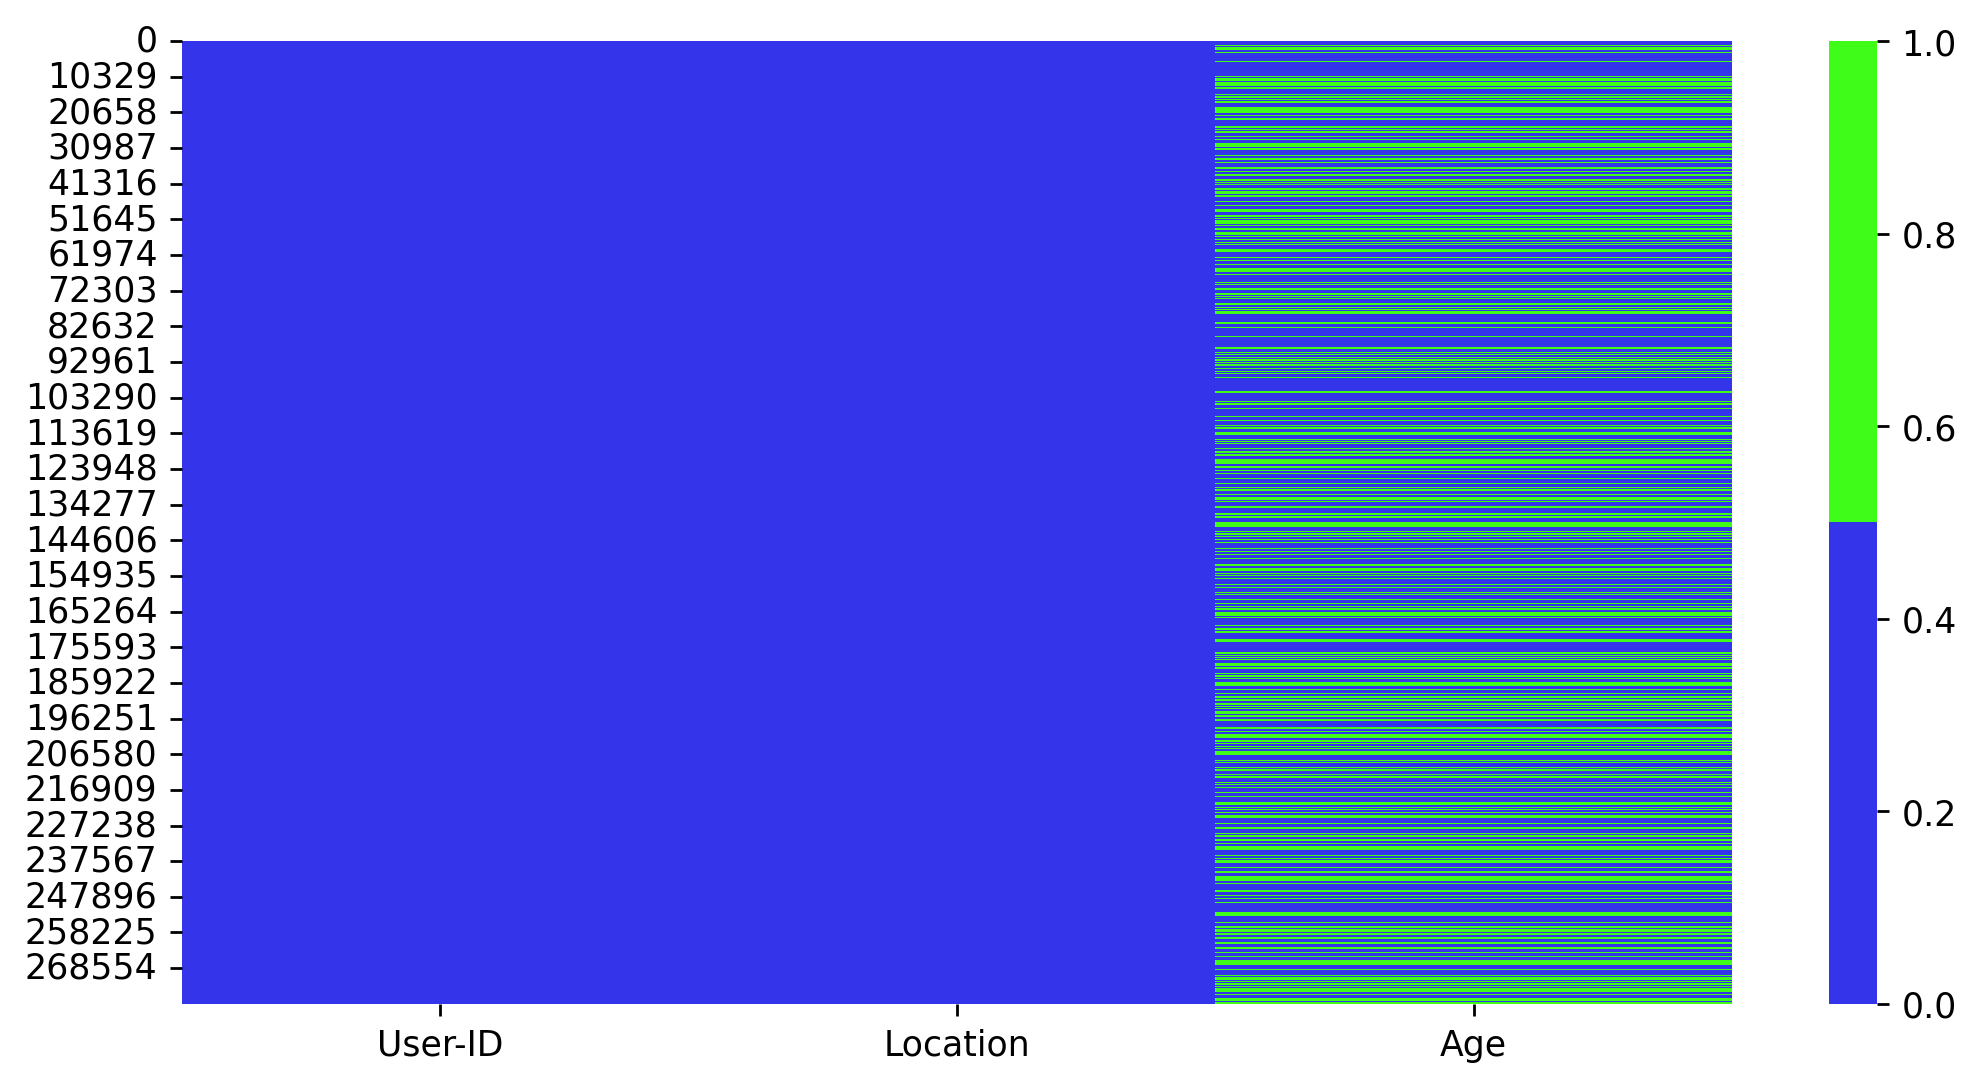

In [40]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

sns.heatmap(user.isna(), cmap=['#3434eb','#3ffc19'])

In [41]:
# unique value in age column
user['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

here we can see NaN values

In [42]:
# replacing nan with average of 'age'
user['Age'].fillna((user['Age'].mean()), inplace=True)

In [43]:
user['Age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

we fix null values for age column with average age.

<Axes: xlabel='Age', ylabel='Density'>

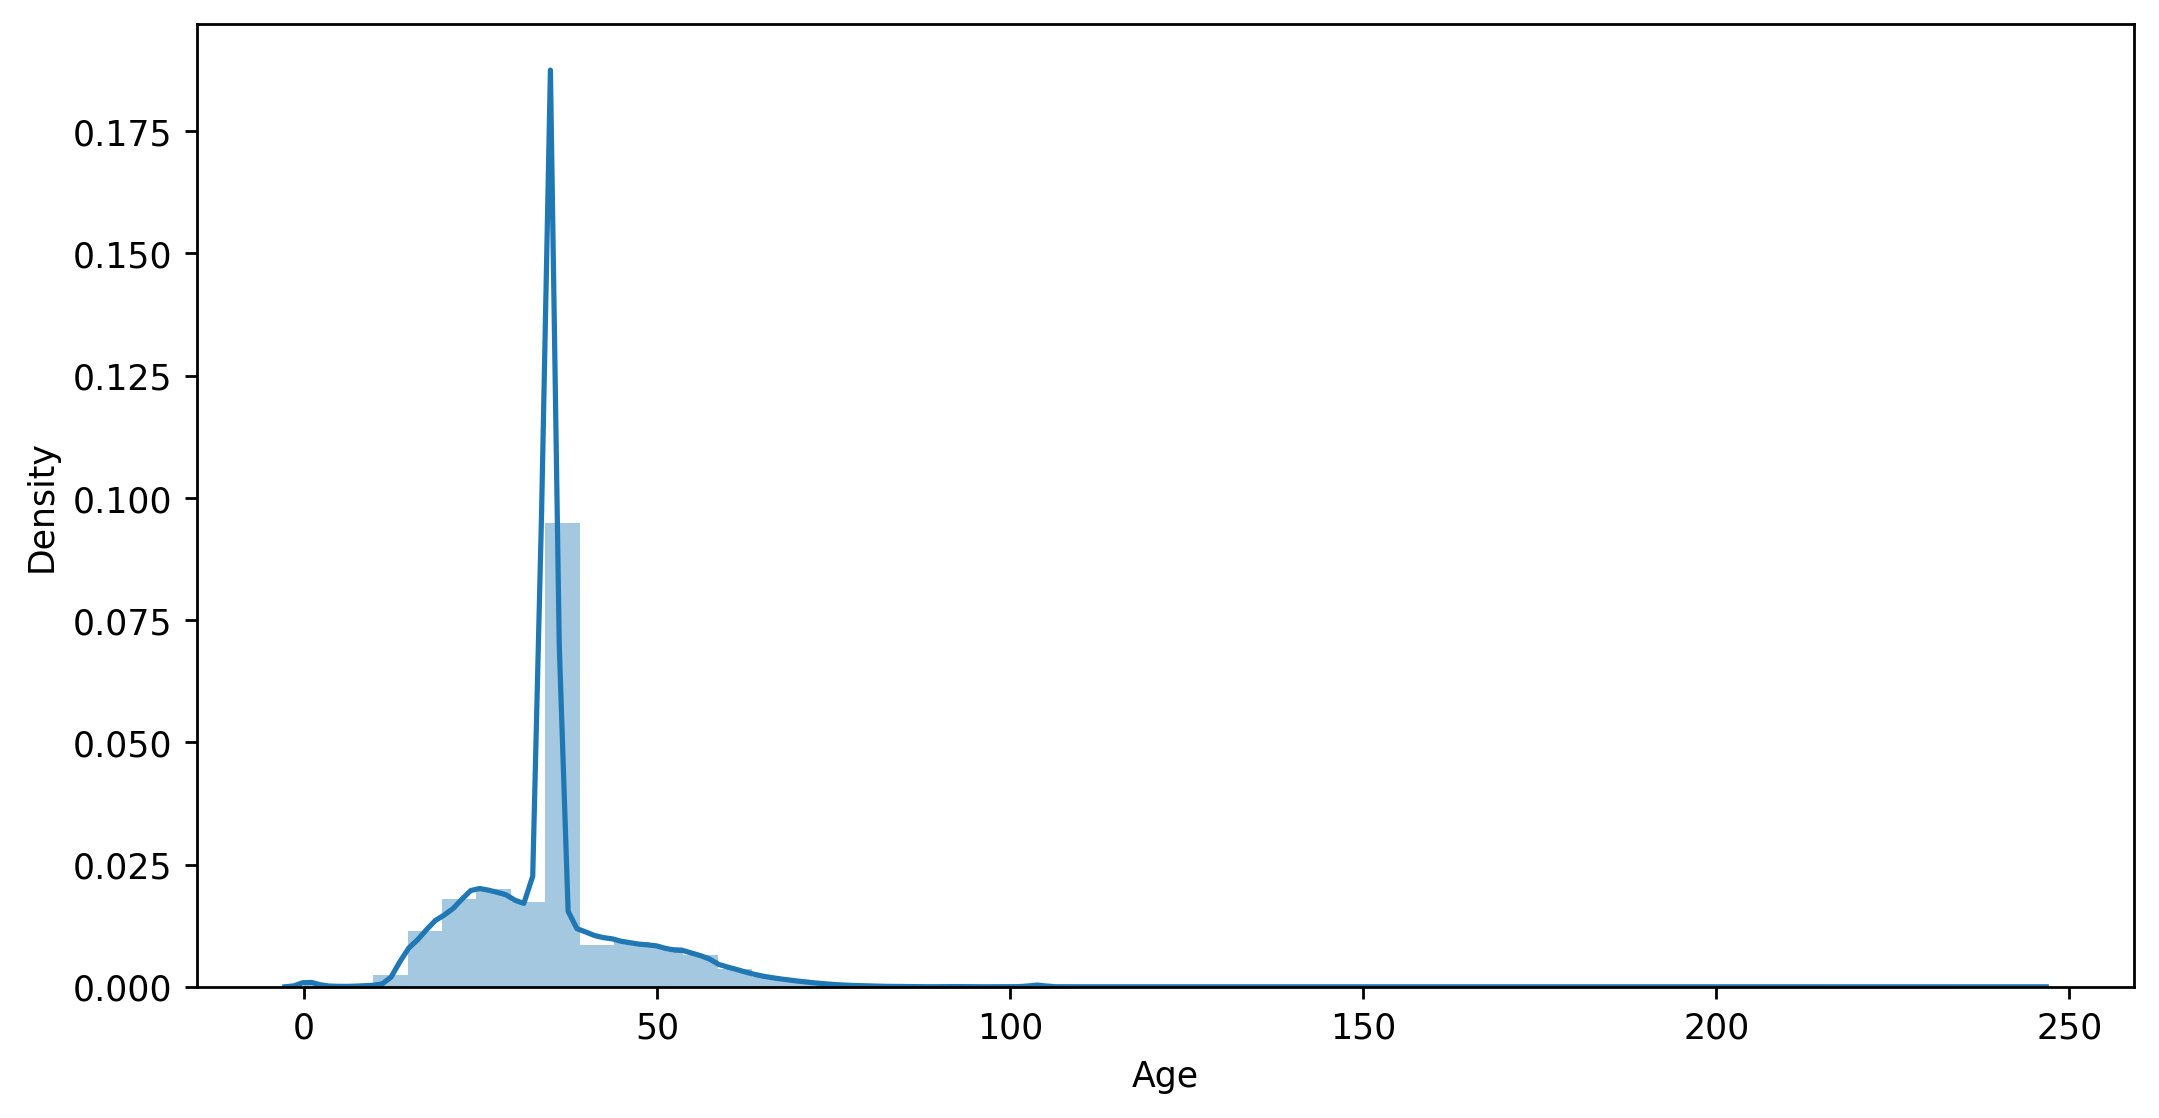

In [44]:
sns.distplot(user['Age'].dropna()) # the distribution is positively skewed (tail to the right)

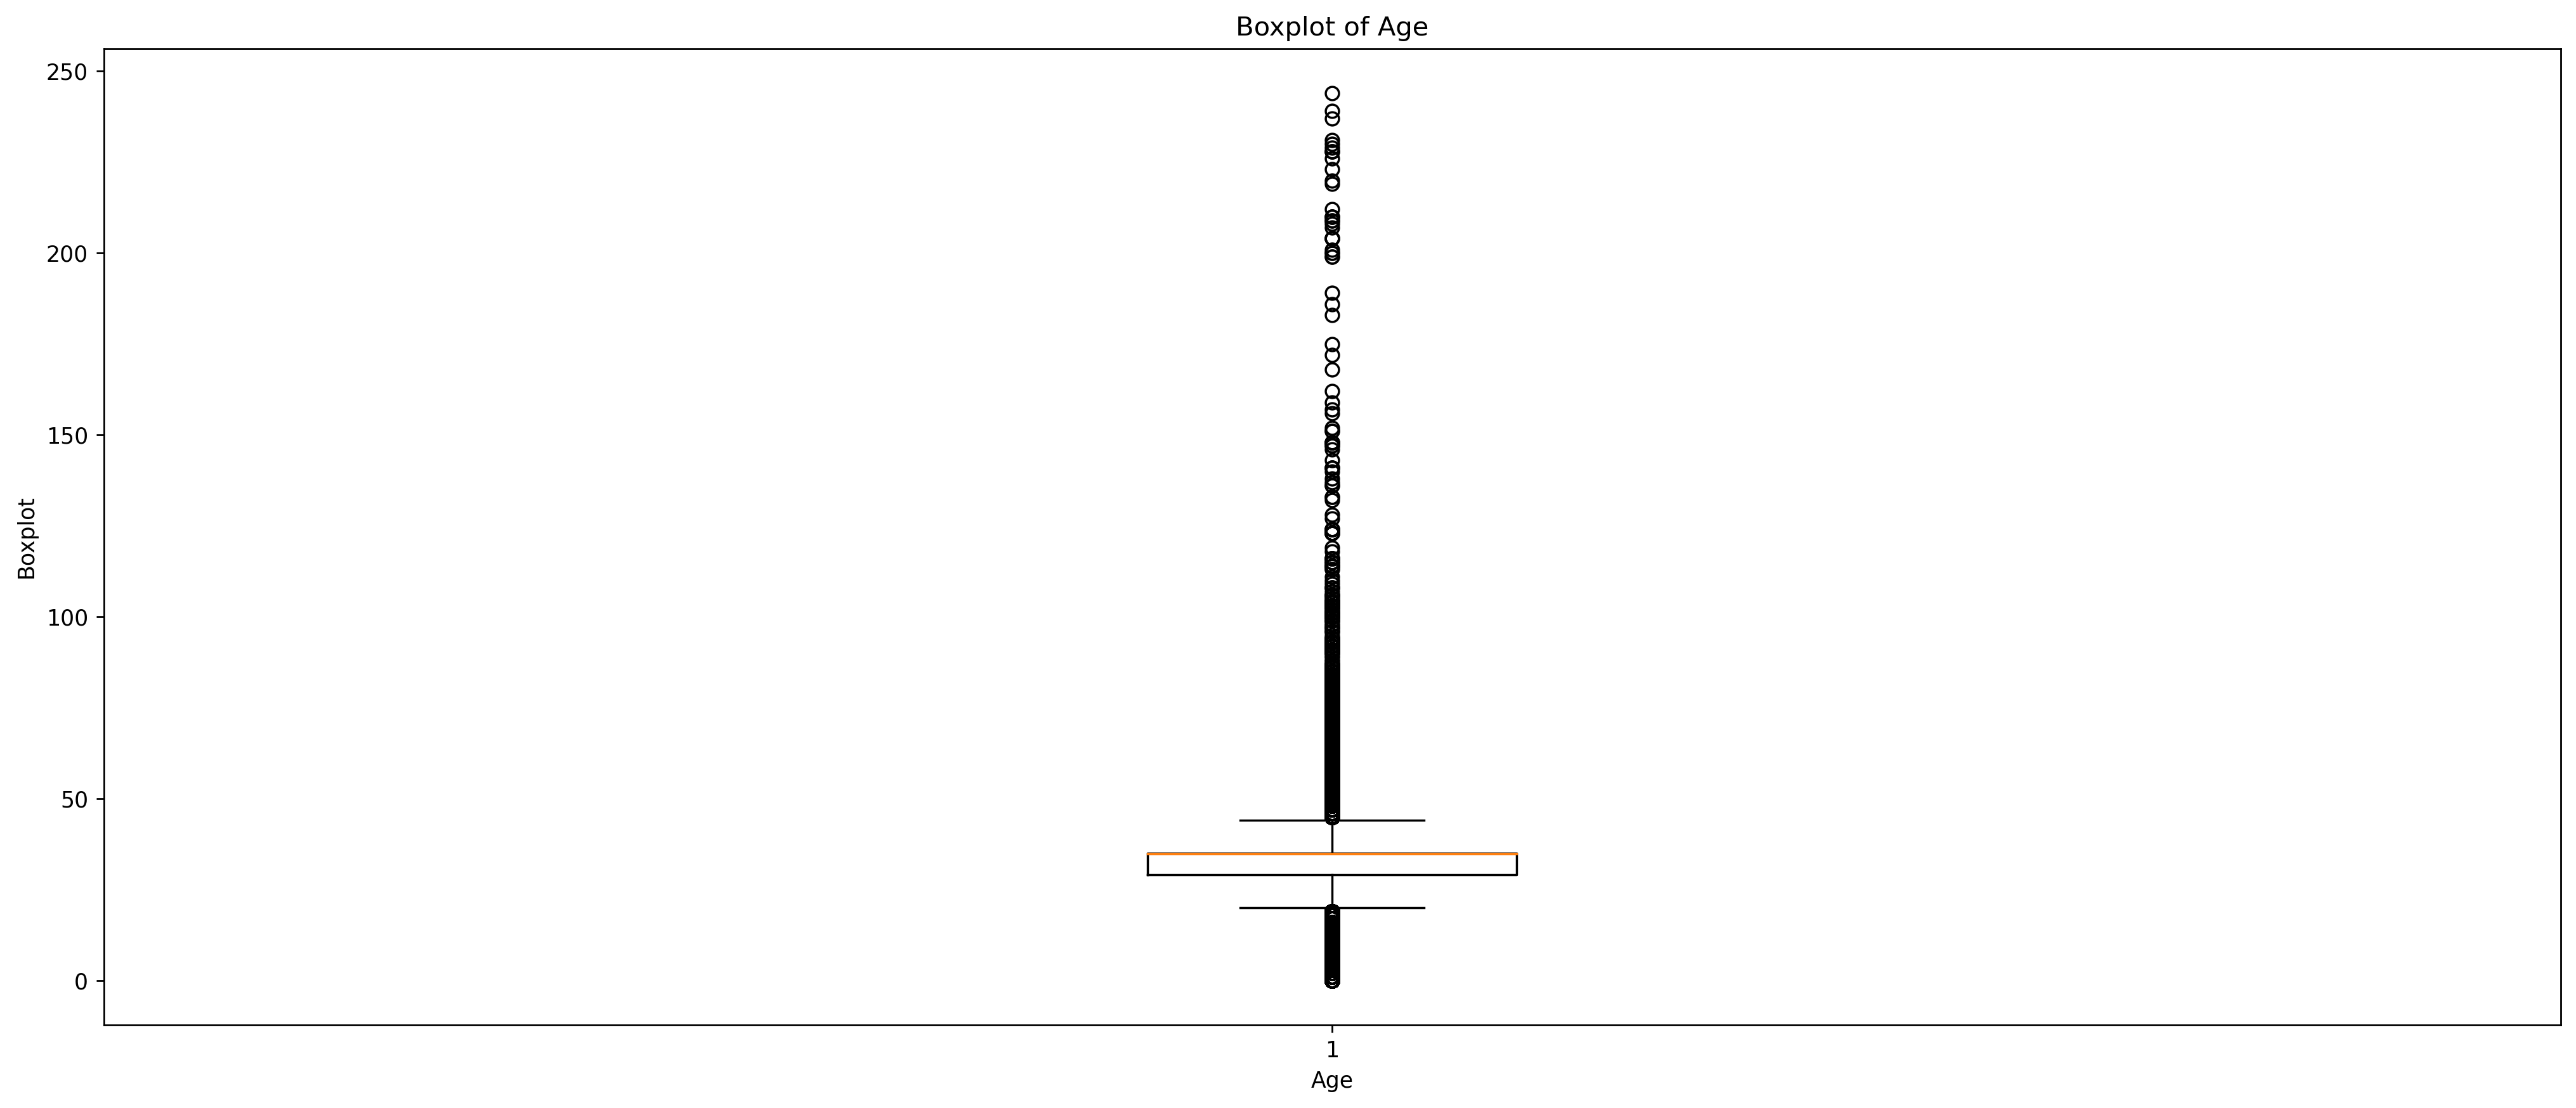

In [45]:
plt.figure(figsize=(20, 8))      # we can see maximum outliers in Age column

plt.boxplot(user['Age'].dropna())  # Drop NaN values before plotting
plt.xlabel('Age')
plt.ylabel('Boxplot')
plt.title('Boxplot of Age')
plt.show()

# Rating dataset

In [46]:
rt.head()        # ISBN column is same from rating and book dataset

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [47]:
# finding unique ISBNs from rating and book dataset
unique_ratings = rt[rt.ISBN.isin(bk.ISBN)]
unique_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [48]:
print(rt.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [49]:
# unique ratings from 'book_rating' feature
unique_ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

#Data Visualizations

Data visualization using book dataset

<Axes: xlabel='Year-Of-Publication', ylabel='Density'>

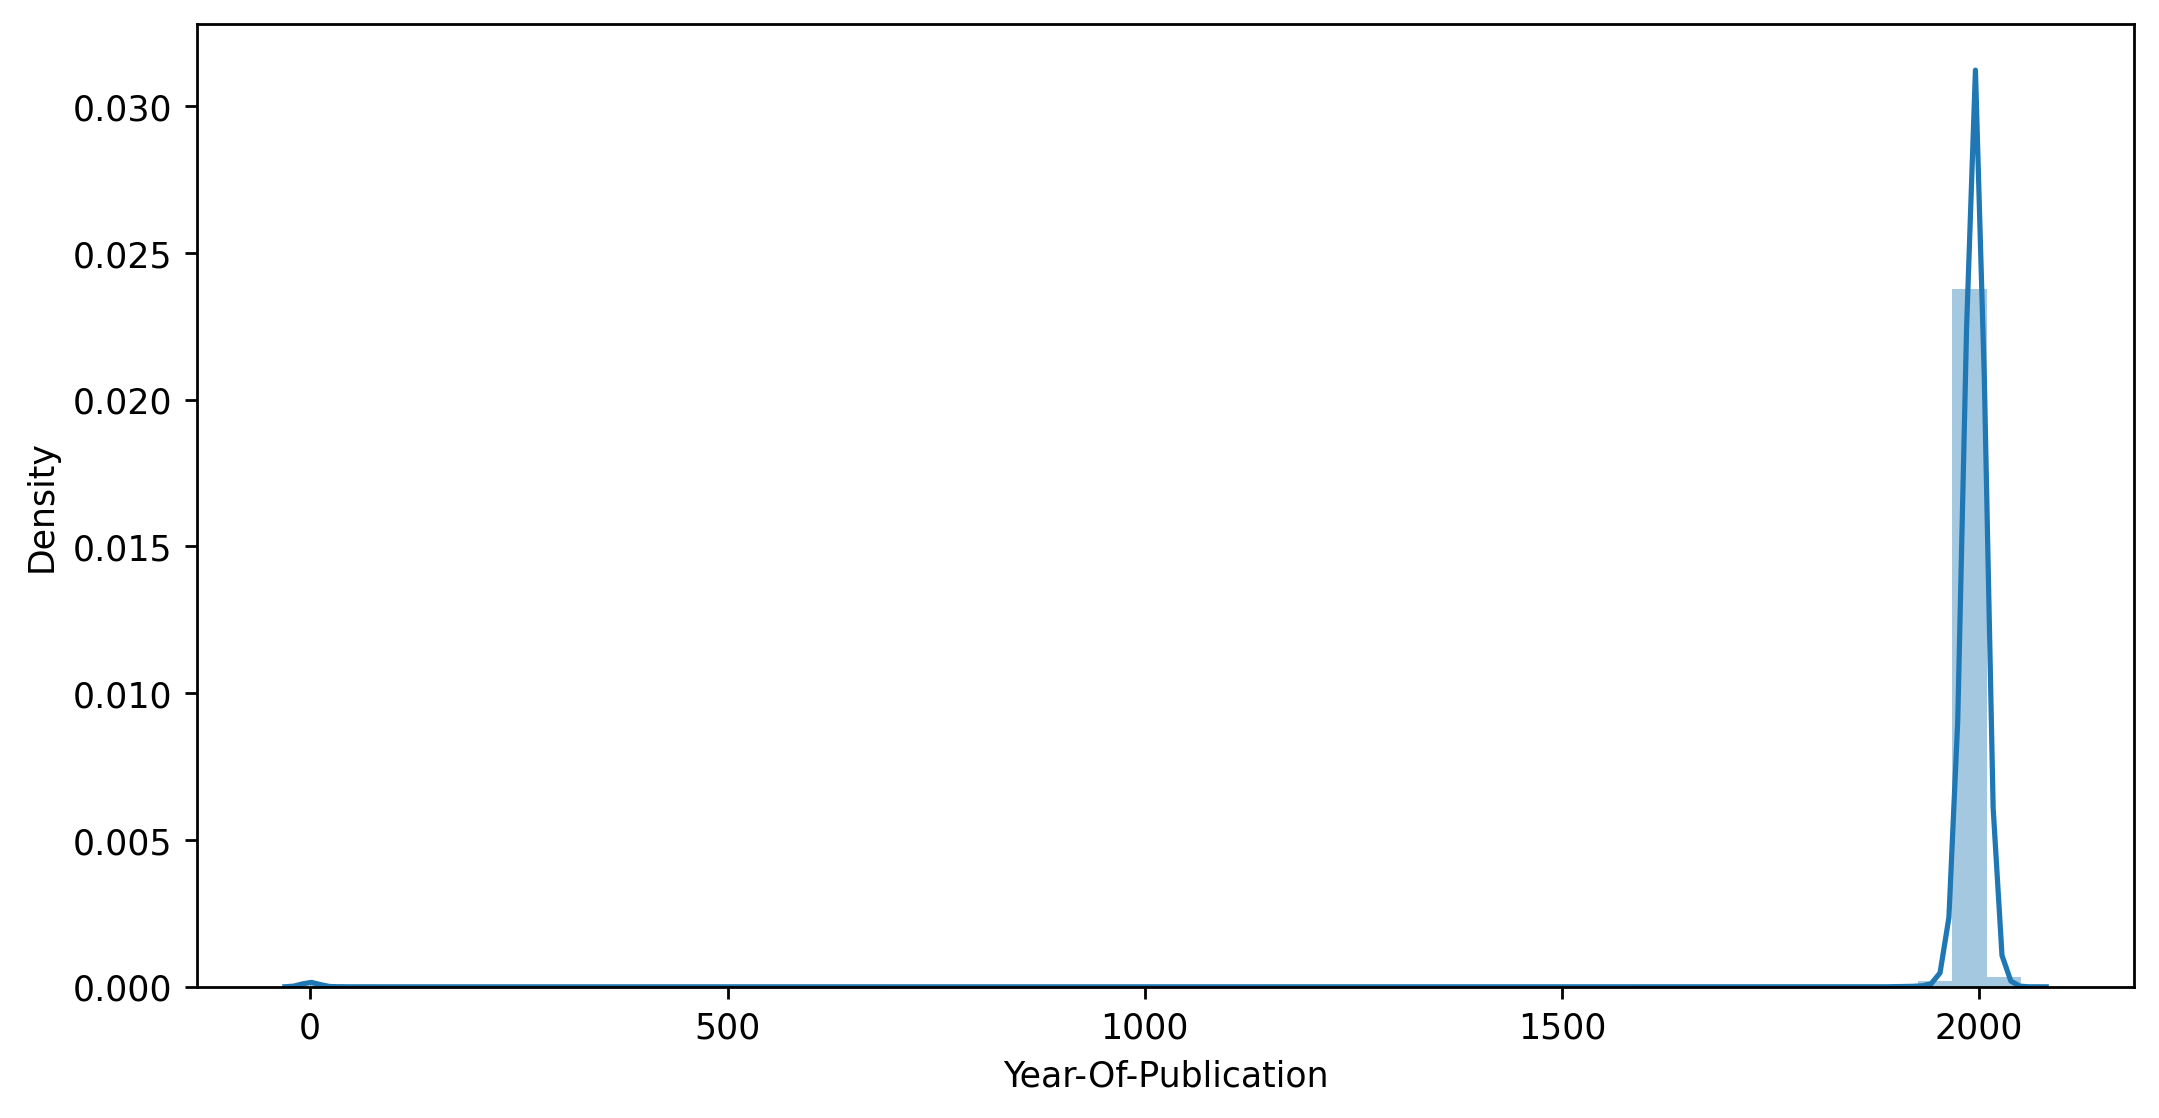

In [50]:
# Replace non-numeric values with NaN
bk['Year-Of-Publication'] = pd.to_numeric(bk['Year-Of-Publication'], errors='coerce')

# Plot the distribution
sns.distplot(bk['Year-Of-Publication'].dropna())  # Drop NaN values before plotting


Distribution of books ratings

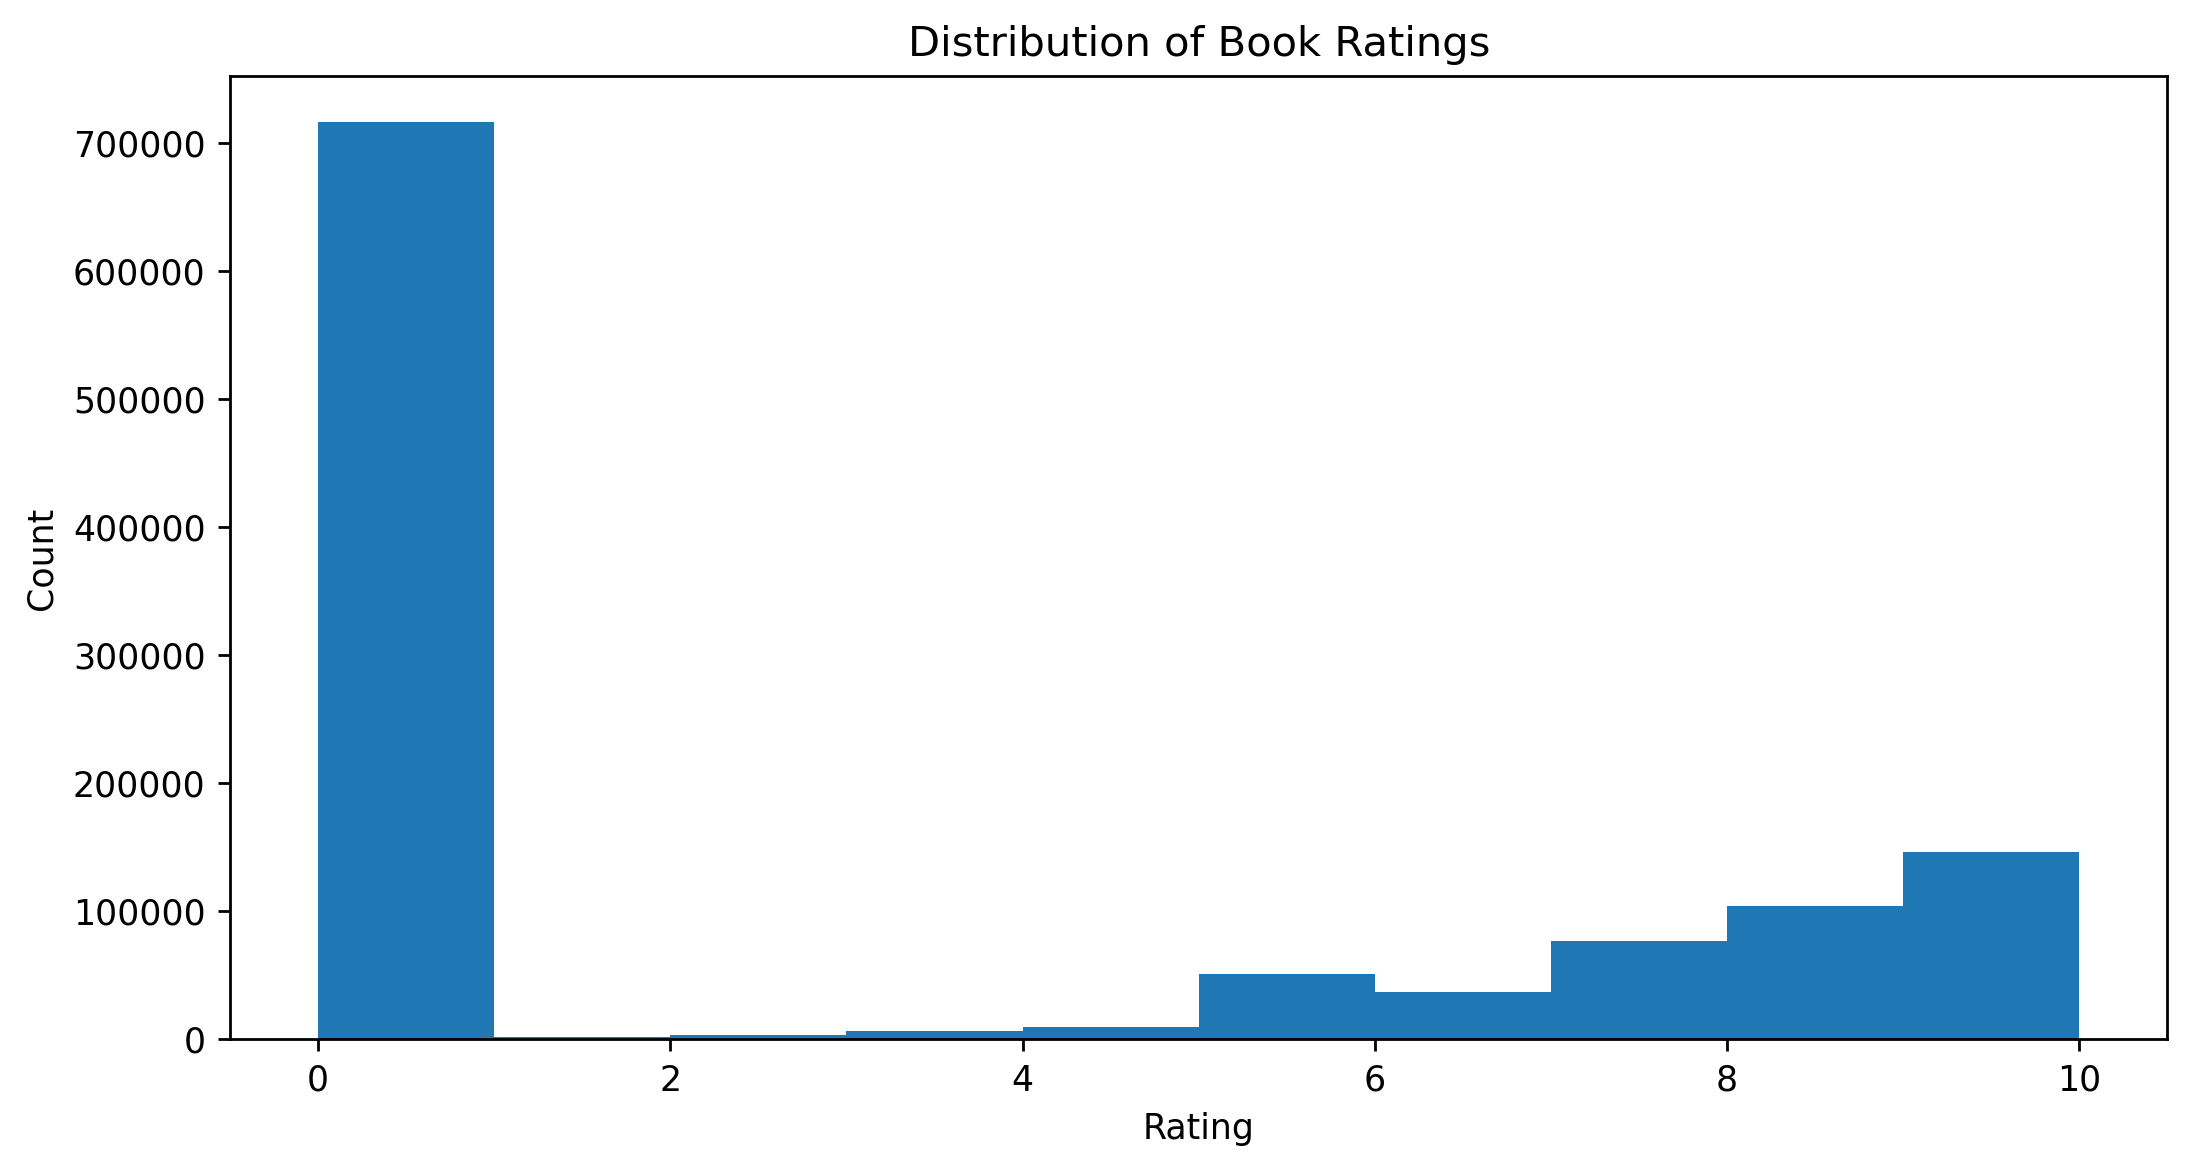

In [51]:
# Plot histogram of book ratings
plt.hist(rt['Book-Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Book Ratings')
plt.show()

In [52]:
unique_publishers = bk['Publisher'].unique()  # Get unique publisher values as a NumPy array
count_unique_publishers = len(unique_publishers)  # Count the number of unique publishers

print("Number of unique publishers:", count_unique_publishers)


Number of unique publishers: 16805


Top 10 publishers with the most books

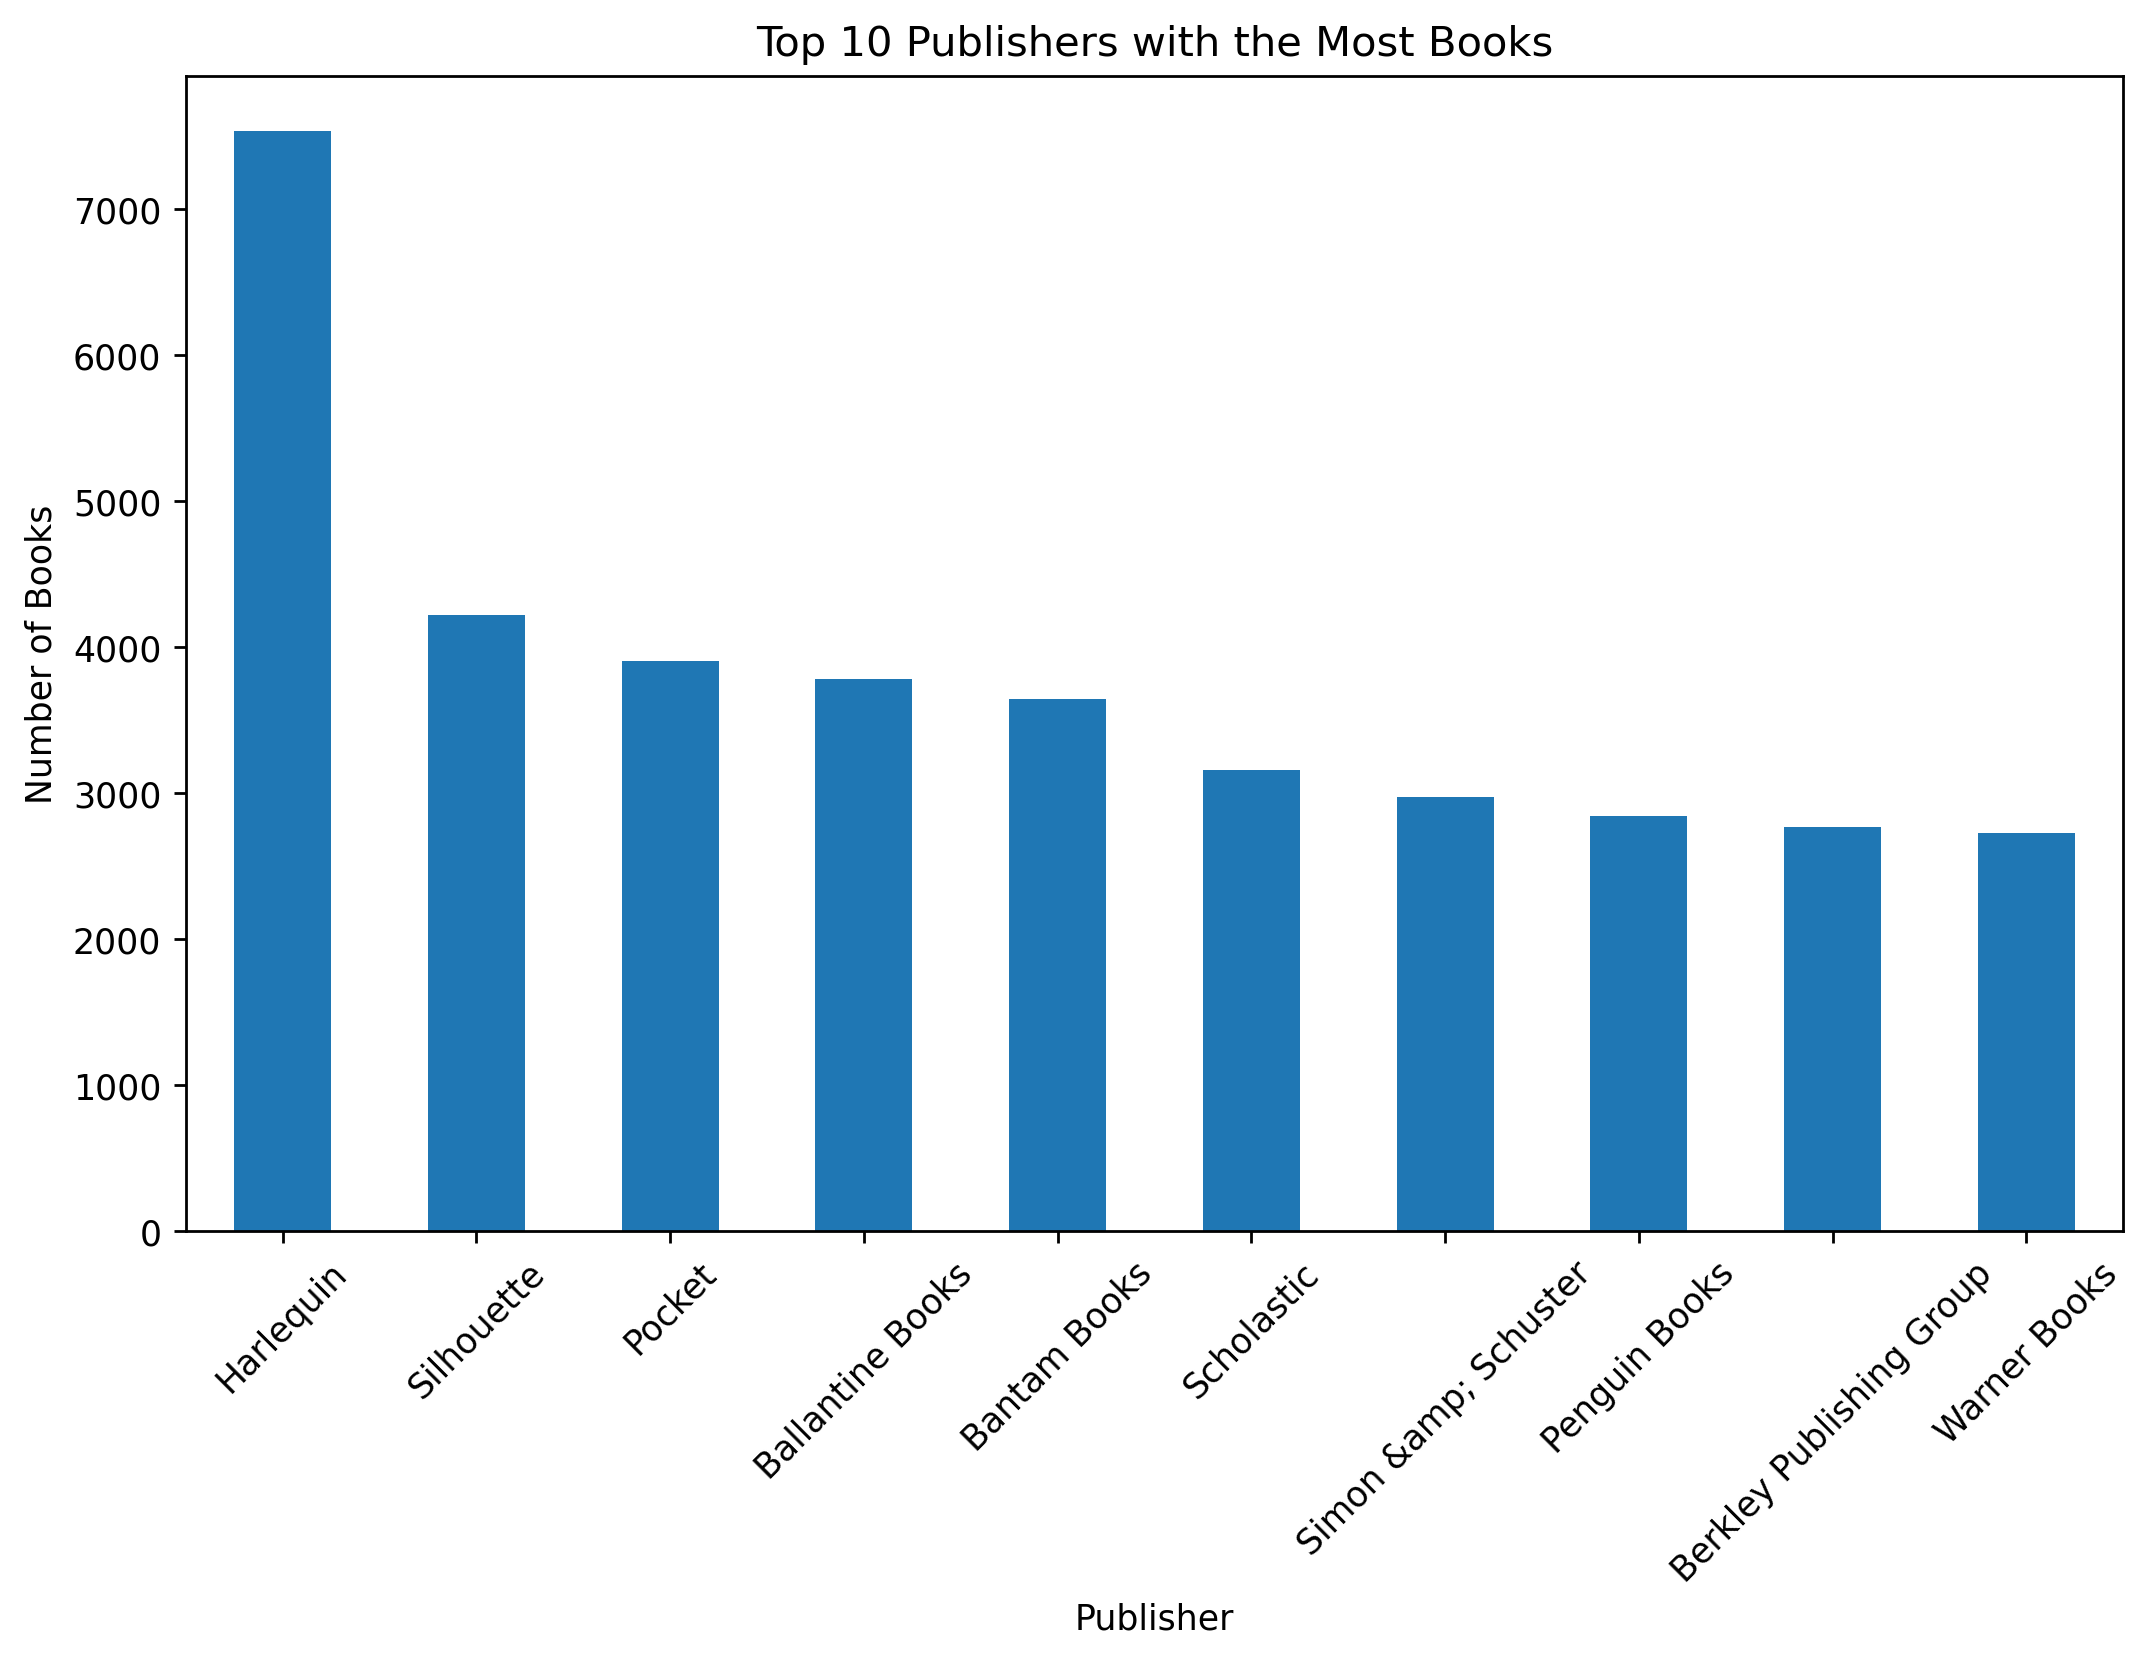

In [53]:
top_publishers = bk['Publisher'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers with the Most Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

Top 10 Authors with the most books

In [54]:
unique_author = bk['Book-Author'].unique()  # Get unique author values as a NumPy array
count_unique_author = len(unique_author)  # Count the number of unique author

print("Number of unique Author:", count_unique_author)

Number of unique Author: 102022


Text(0.5, 1.0, 'Top 10 author with number of books')

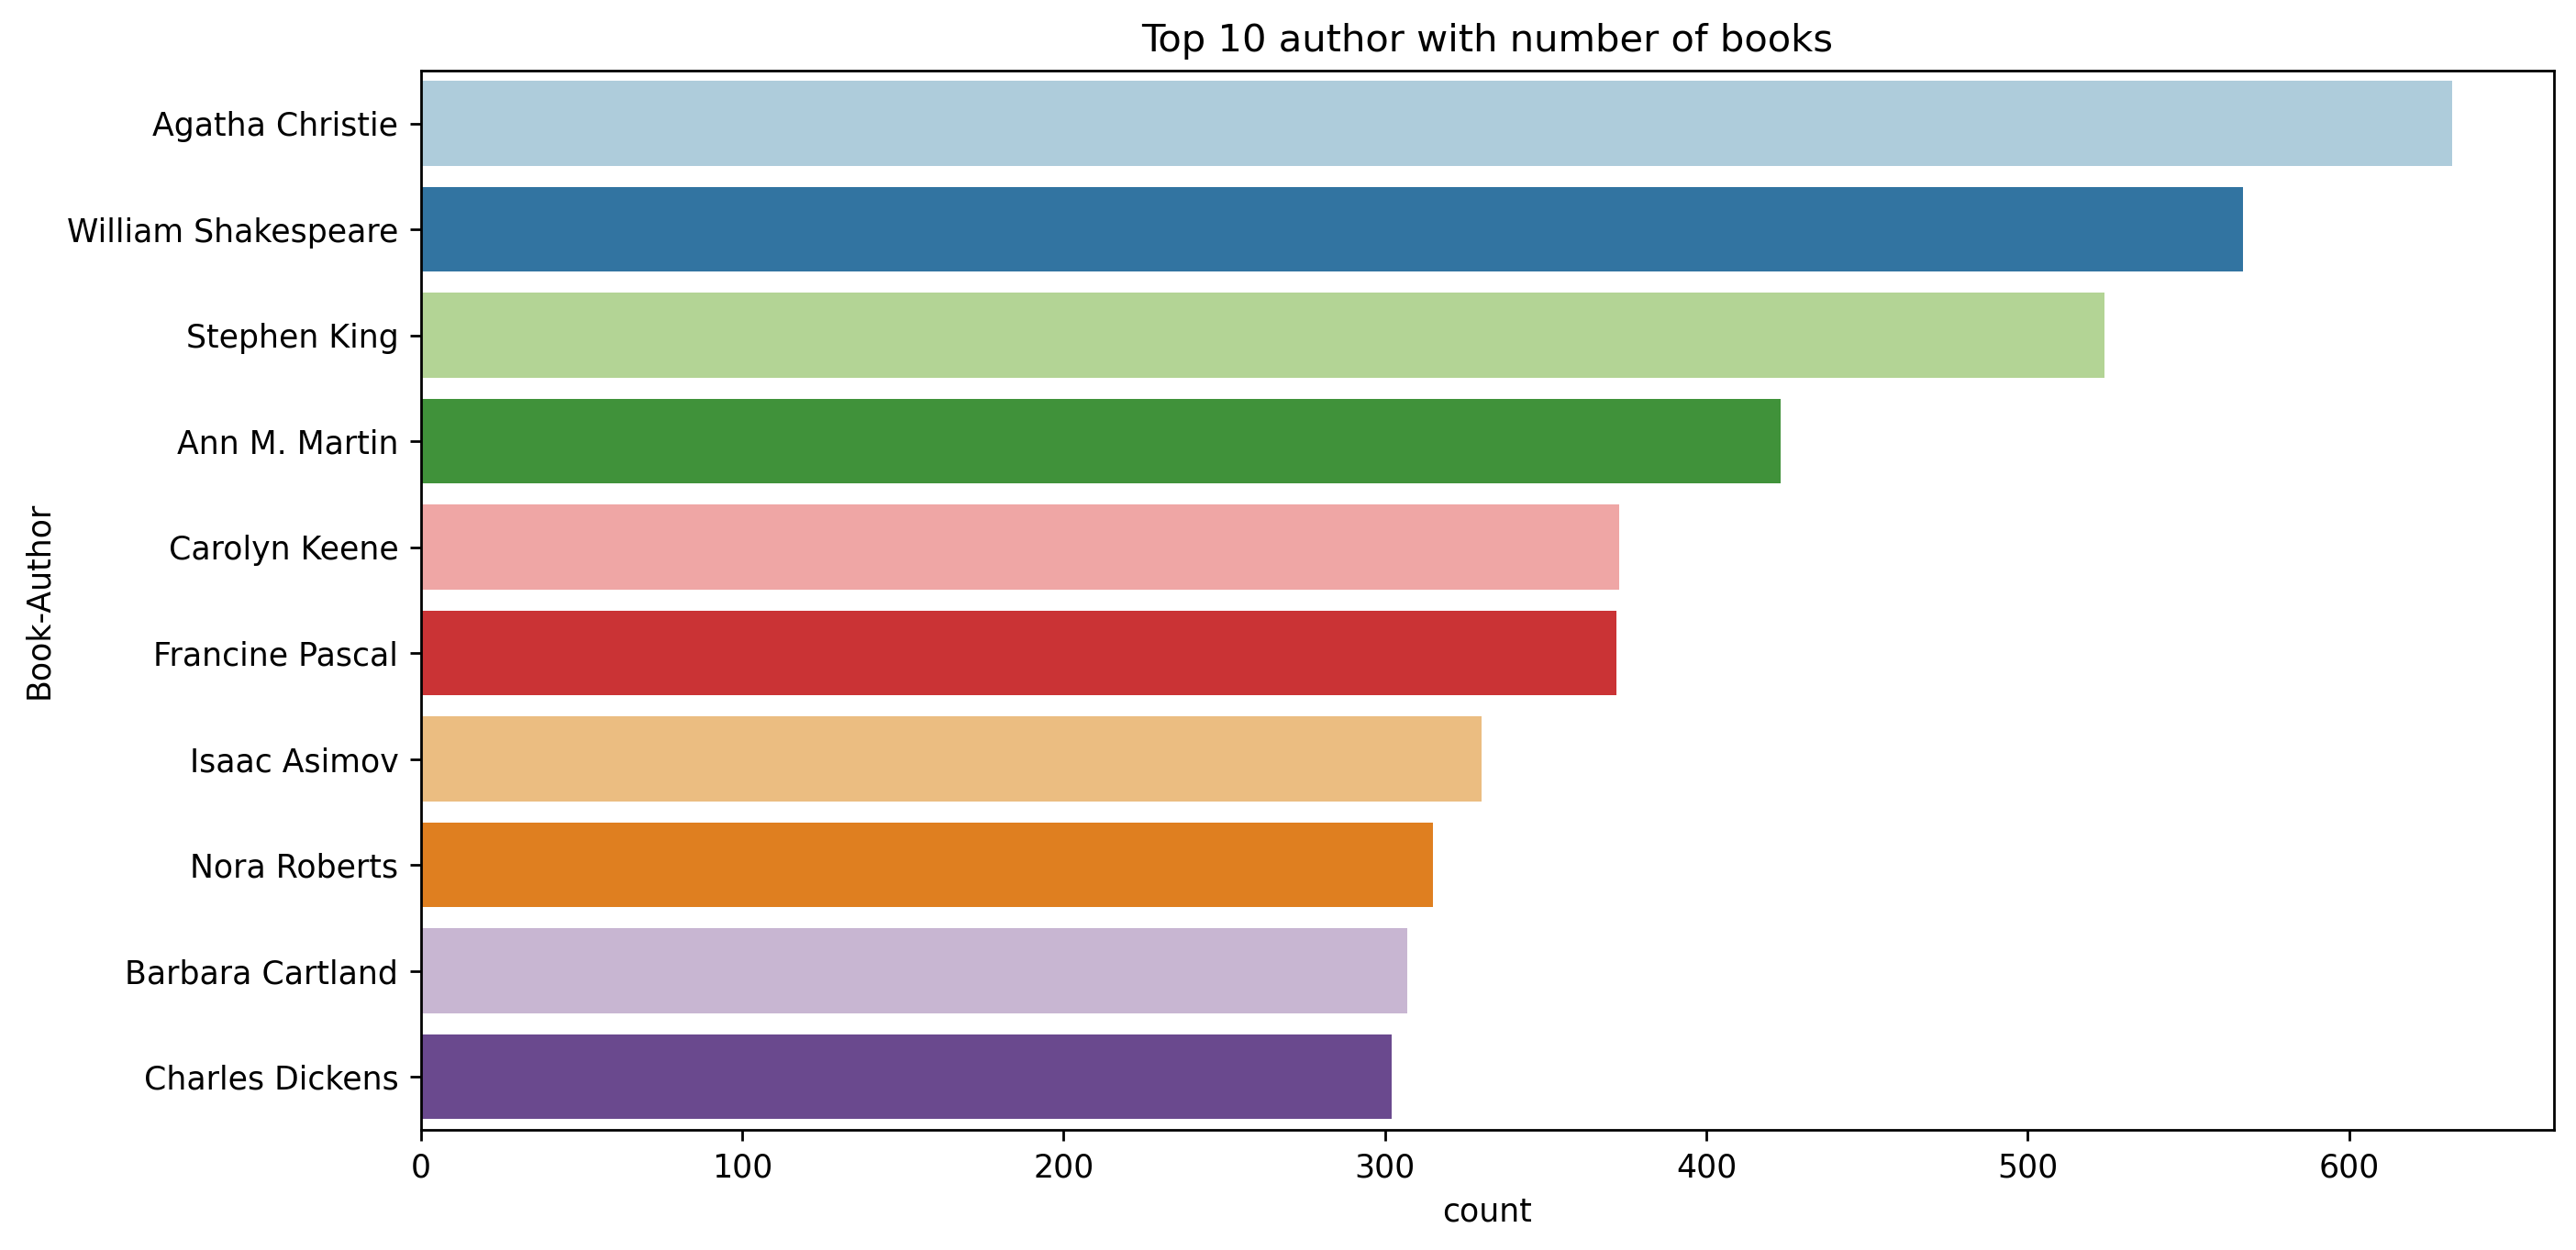

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=bk,order=bk['Book-Author'].value_counts().index[0:10])
plt.title("Top 10 author with number of books")

In [56]:
unique_books = bk['Book-Title'].unique()  # Get unique books values as a NumPy array
count_unique_books = len(unique_books)  # Count the number of unique books

print("Number of unique Books:", count_unique_books)


Number of unique Books: 242135


Top 10 years when most books got published

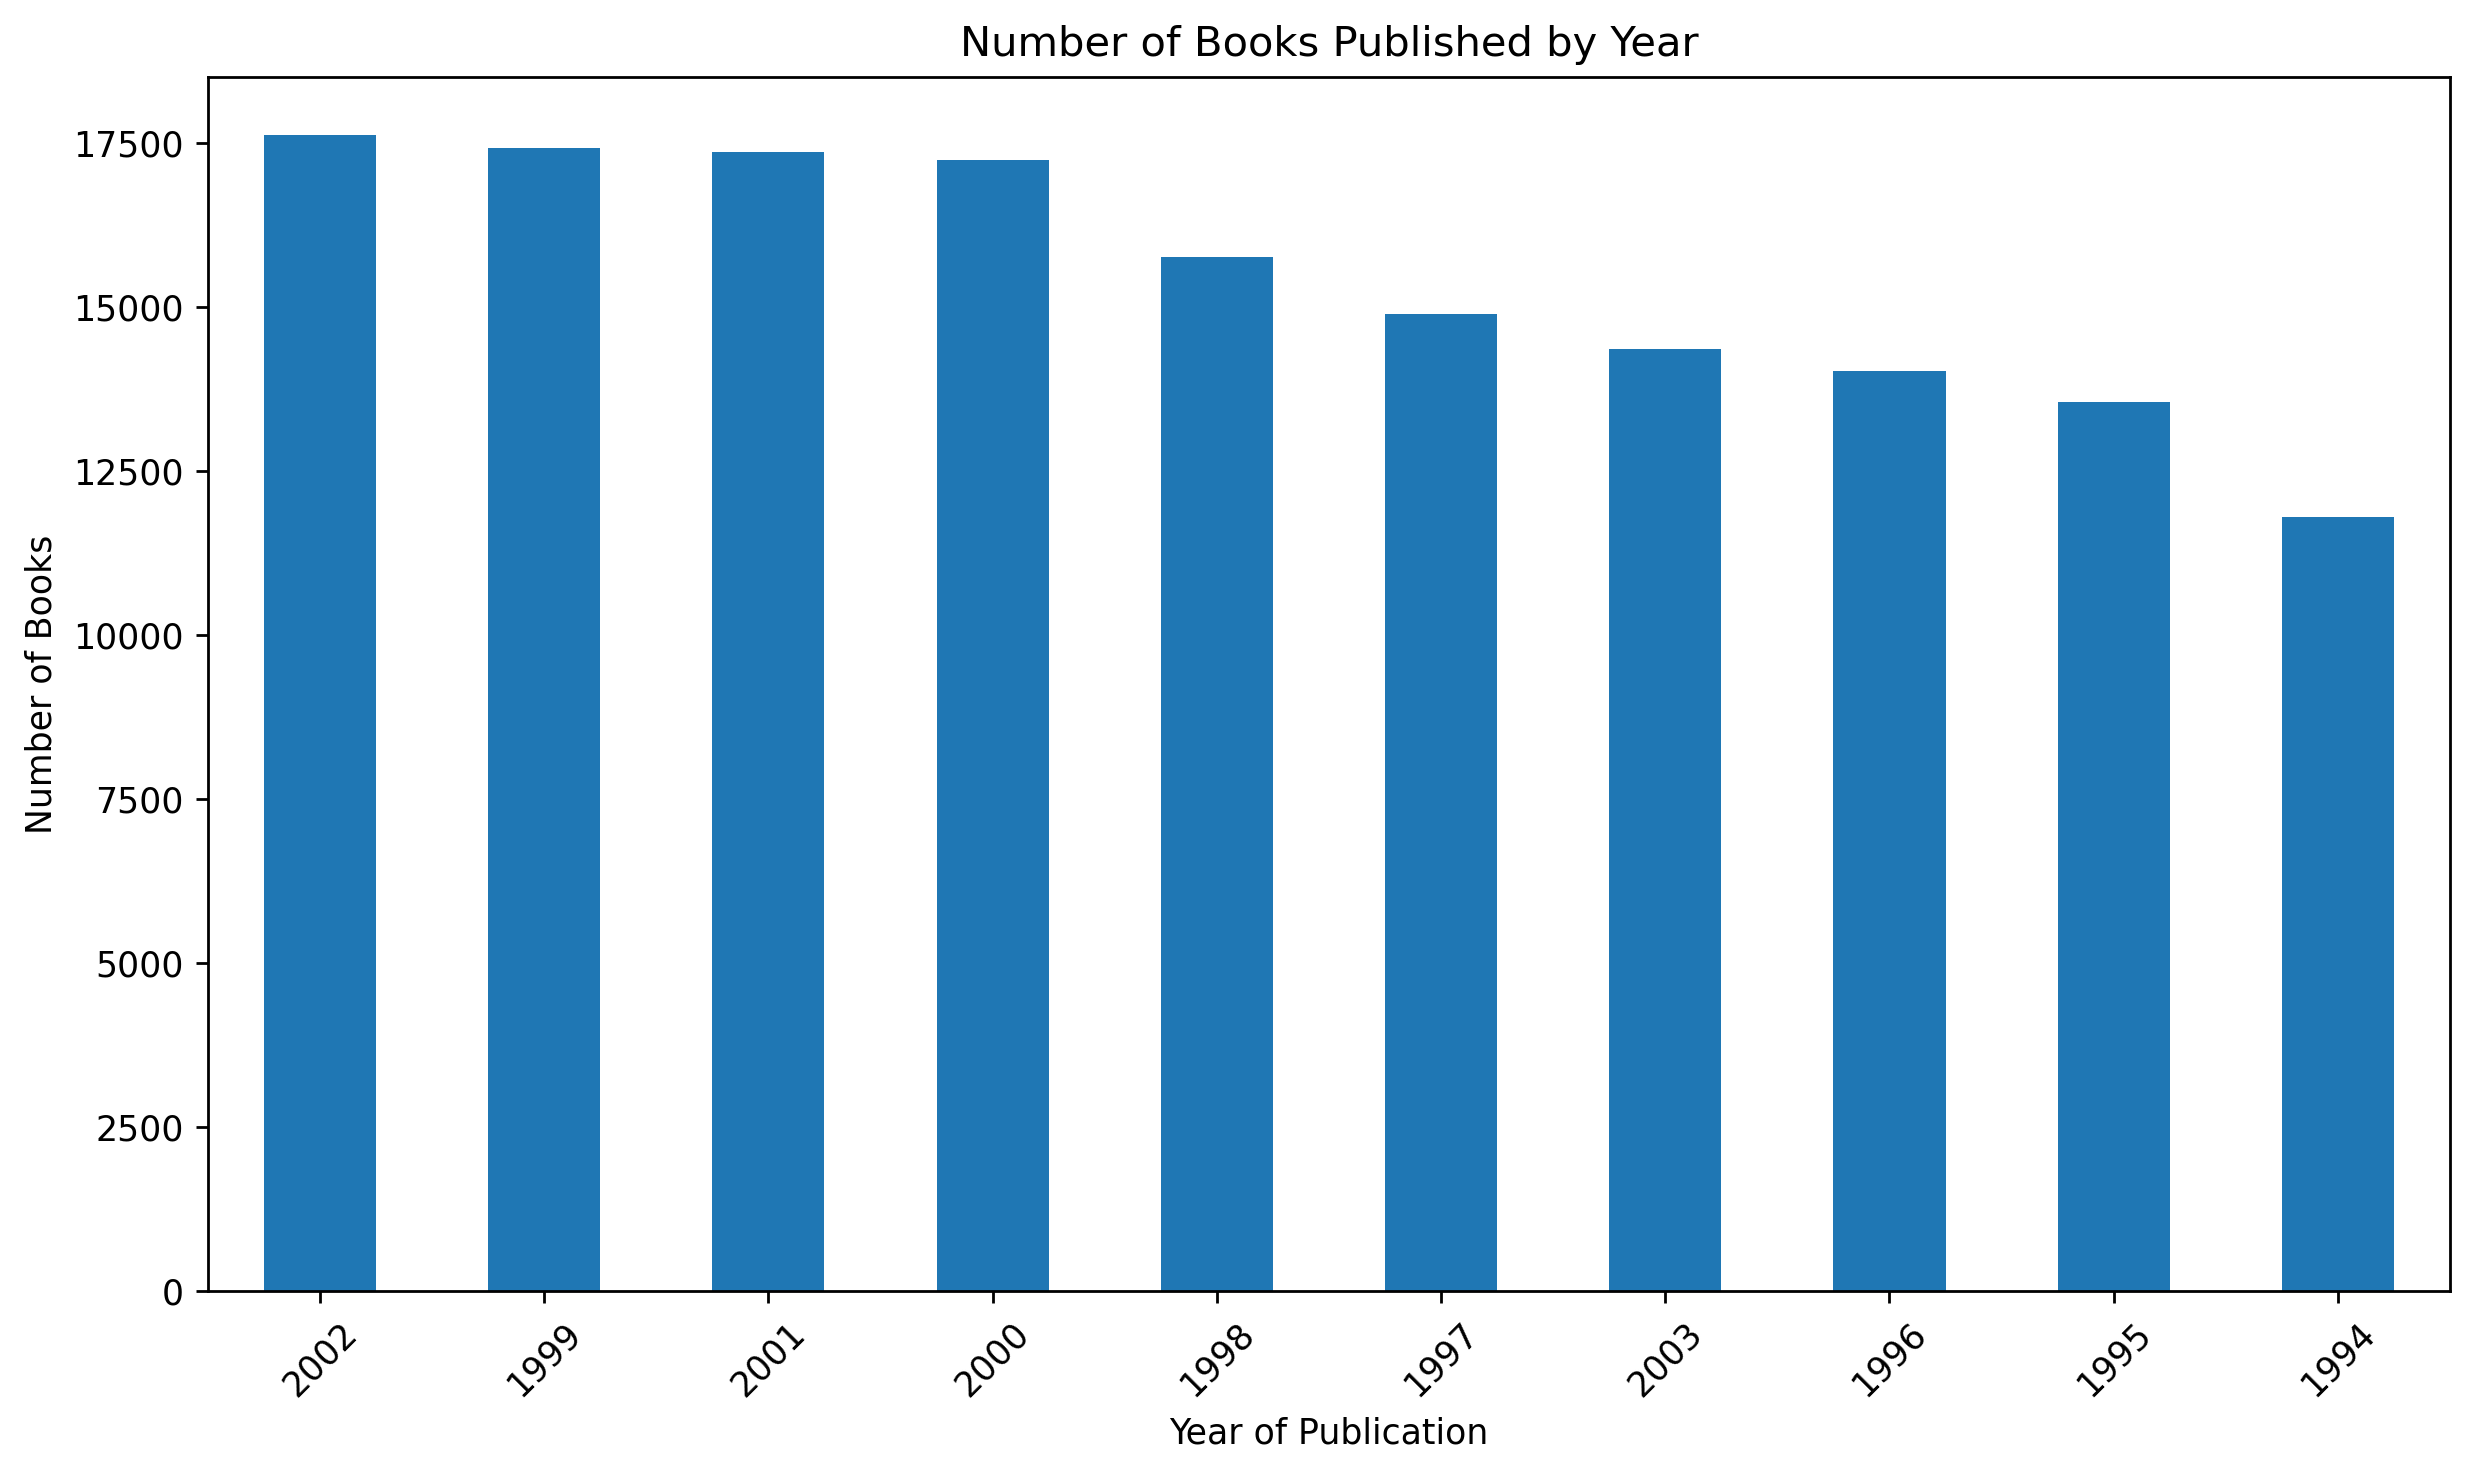

In [57]:
# Group the data by Year-Of-Publication and count the number of books in each year
year_counts = bk['Year-Of-Publication'].value_counts().sort_values(ascending=False)


# Top 10 years with the most books published
top_10_years = year_counts.head(10)

# Convert years to integers
top_10_years.index = top_10_years.index.astype(int)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar')
plt.title('Number of Books Published by Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Age distributions of users_data

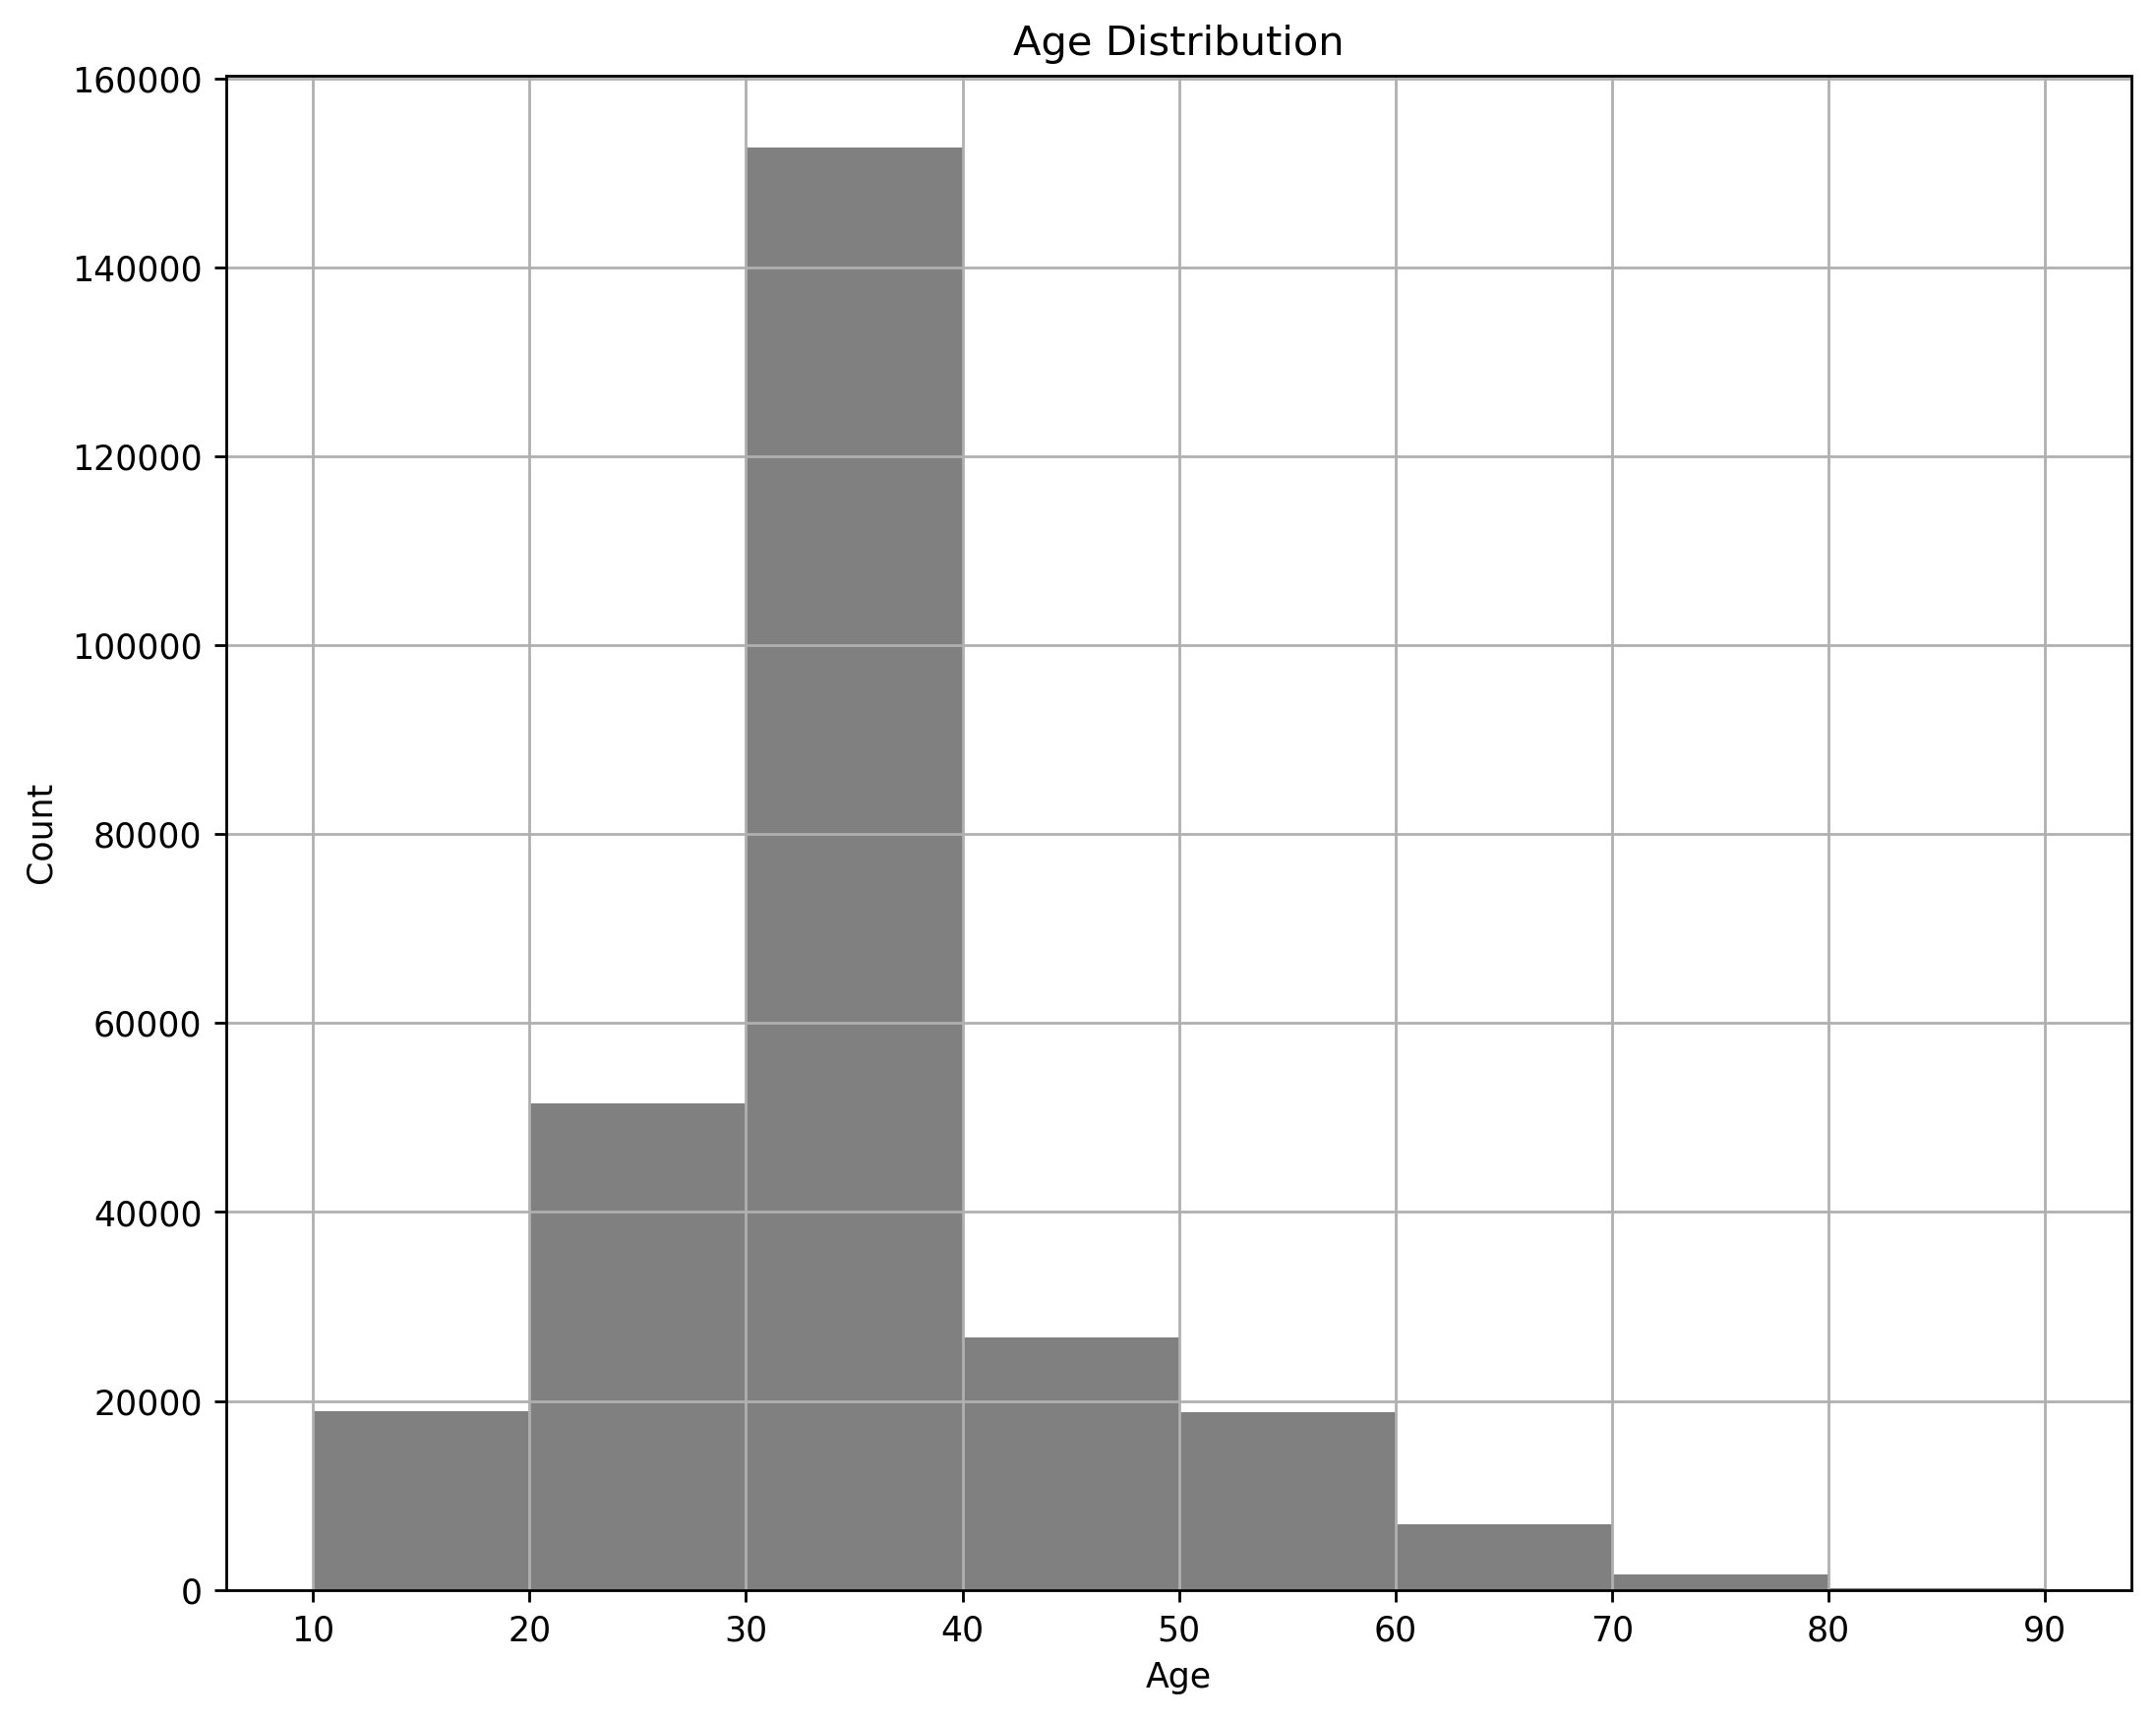

In [58]:
plt.figure(figsize=(10,8))
user.Age.hist(bins=[10*i for i in range(1, 10)], color = 'grey')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Top 10 books as per the number of ratings

Text(0.5, 1.0, 'Top 10 books as per number of ratings')

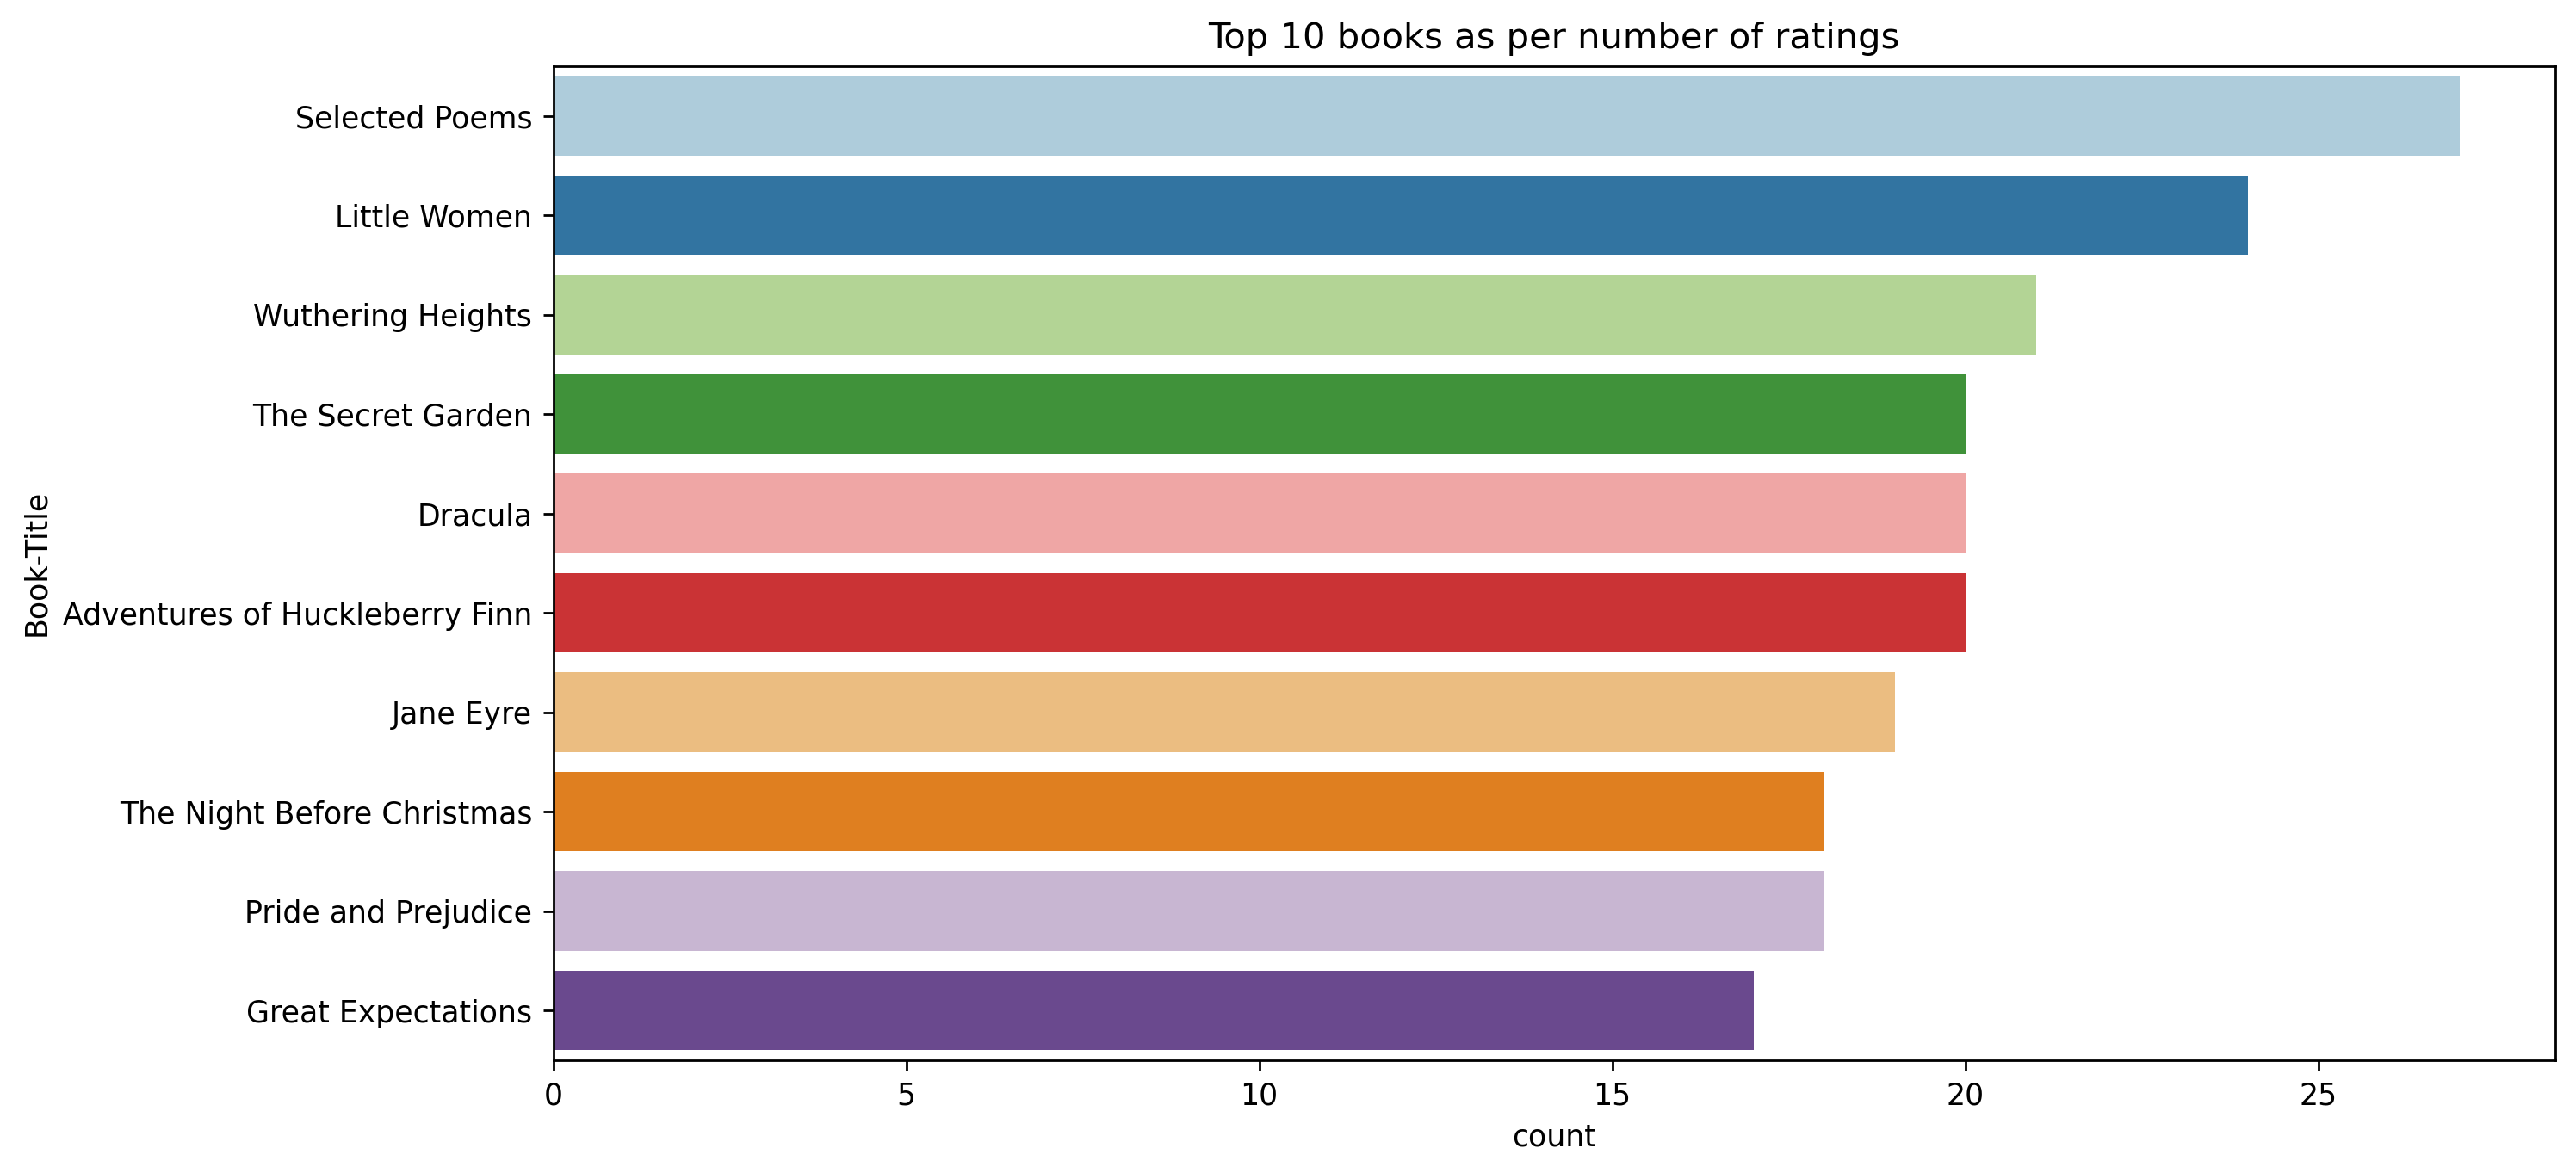

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Title",palette = 'Paired',data= bk, order=bk['Book-Title'].value_counts().index[0:10])
plt.title("Top 10 books as per number of ratings")

<Axes: xlabel='Book-Rating', ylabel='count'>

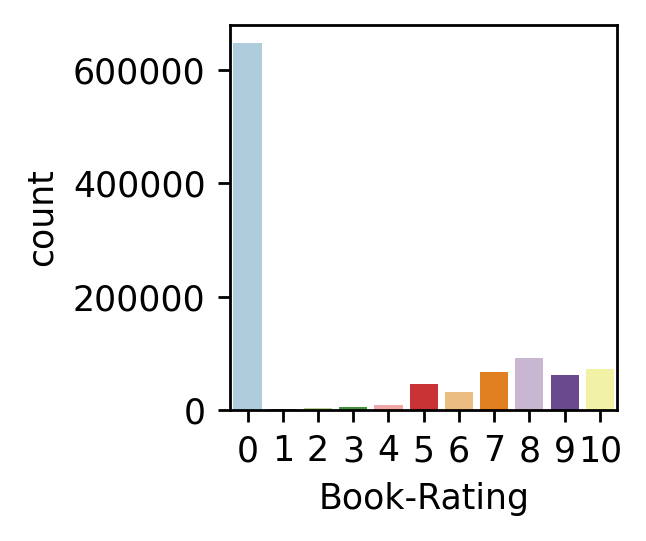

In [60]:
plt.figure(figsize=(2,2))
sns.countplot(x="Book-Rating",palette = 'Paired',data= unique_ratings)

#Model:  Popularity Based Recommender System

In [61]:
ratings_with_name = rt.merge(bk,on='ISBN')

In [62]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [63]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [64]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


# top 50 most popular books

In [65]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [66]:
popular_df = popular_df.merge(bk,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [67]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [68]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# Model: Collaborative Filtering Based Recommender System

In [69]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
rating_by_users = x[x].index

In [70]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(rating_by_users)]

In [71]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [72]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [73]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [74]:
pt.fillna(0,inplace=True)

In [75]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
similarity_scores = cosine_similarity(pt)

In [78]:
similarity_scores   # find similarity with each book and each user

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [79]:
def recommend(book_name, pt, similarity_scores, bk):
    try:
        # Find the index of the given book_name
        index = np.where(pt.index == book_name)[0][0]

        # Sort and select similar items
        similar_items = sorted(enumerate(similarity_scores[index]), key=lambda x: x[1], reverse=True)[1:5]

        data = []
        for i in similar_items:
            item = []
            temp_df = bk[bk['Book-Title'] == pt.index[i[0]]]
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

            data.append(item)

        return data
    except IndexError:
        # Handle the case where the book_name is not found in pt.index
        return "Book not found in the database"

# Usage example:
recommended_books = recommend("Book Name", pt, similarity_scores, bk)


In [80]:
similarity_scores.shape

(706, 706)

In [81]:
recommend("1984", pt, similarity_scores, bk)

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [82]:
pt.index[0]

'1984'

In [83]:
bk.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [84]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(bk,open('bk.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

NameError: name 'pickle' is not defined

Simple Evaluation Using Existing Data for popularity recommendation evaluation

In [ ]:
# Merge the datasets based on common columns
merged_df = bk.merge(rt, on='ISBN', how='inner')
merged_df = merged_df.merge(user, on='User-ID', how='inner')

In [ ]:
#pip install scikit-surprise

In [ ]:
print(merged_df.head())

In [ ]:
# Calculate popularity scores for each book (e.g., based on average ratings or number of ratings)
popularity_scores = merged_df.groupby('User-ID')['Book-Rating'].mean().reset_index()
popularity_scores.columns = ['User-ID', 'popularity_score']

In [ ]:
# Sort books by popularity score in descending order
popularity_scores = popularity_scores.sort_values(by='popularity_score', ascending=False)

In [ ]:
# Top-N recommendation evaluation using your entire dataset
N = 10  # Number of top recommendations to evaluate

In [ ]:
# Calculate precision and recall for the top-N recommended books
def evaluate_popular_filtering(top_recommendations, data):
    relevant_books = set(data['User-ID'])
    recommended_books = set(top_recommendations['User-ID'][:N])

    # Calculate precision and recall
    precision = len(recommended_books.intersection(relevant_books)) / N
    recall = len(recommended_books.intersection(relevant_books)) / len(relevant_books)

    return precision, recall

precision, recall = evaluate_popular_filtering(popularity_scores, merged_df)
print(f"Precision: {precision}, Recall: {recall}")

Precision is 1.0, This suggests that the system is highly accurate in terms of relevance.

A low recall value indicates that the system is not effective at finding all relevant books.
A low recall value means it suggests that the popularity-based system is not able to recommend a large portion of the books that users in the test dataset might find relevant.

# Collaborative Filtering evaluation Recommender System

Collaborative Filtering: Collaborative filtering is a recommendation technique that relies on user-item interactions or user-item ratings to make recommendations. SVD is often used in collaborative filtering to reduce the dimensionality of the user-item interaction matrix. By applying SVD to this matrix, you can uncover latent factors that represent user preferences and item characteristics. These latent factors are then used to make recommendations by predicting how a user would rate or interact with items they haven't seen before.

In [ ]:
pip install scikit-surprise

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from surprise import SVD  # Example collaborative filtering algorithm

In [ ]:
merged_df.head(2)

In [ ]:
columns_to_drop = ['Image-URL-M', 'Image-URL-L', 'Location', 'Age']
merged_df = merged_df.drop(columns=columns_to_drop)

In [ ]:
# Create a Reader object specifying the rating scale
reader = Reader(rating_scale=(1, 10))

In [ ]:
# Load the merged_df into Surprise format
data = Dataset.load_from_df(merged_df[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [ ]:
# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)  # Use a fixed random_state for reproducibility

In [ ]:
# Build the full training set (convert DatasetAutoFolds to Dataset)
trainset = data.build_full_trainset()

In [ ]:
# Train a collaborative filtering model (SVD in this case)
model = SVD()
model.fit(trainset)

In [ ]:
# Make predictions on the test set
predictions = model.test(testset)

In [ ]:
# Calculate RMSE (Root Mean Square Error) as a measure of prediction accuracy
rmse = accuracy.rmse(predictions)

RMSE value says , on average, the predicted ratings are approximately 1.2000 units away from the actual ratings.

In [ ]:
# Calculate MAE (Mean Absolute Error) as another measure of accuracy
mae = accuracy.mae(predictions)

MAE value says here on average, the predicted ratings differ from the actual ratings by approximately 1.0209 units.

In [ ]:
print(f"RMSE: {rmse}, MAE: {mae}")

This code builds the full training set using the build_full_trainset method and then trains the collaborative filtering model using the full training set. After training, it makes predictions on the test set and calculates RMSE and MAE for evaluation.

In [ ]:
pip freeze > requirements.txt

In [ ]:
import pickle

# Save the 'popular_df' DataFrame to 'popular.pkl'
with open('popular.pkl', 'wb') as popular_file:
    pickle.dump(popular_df, popular_file)
    
with open('pt.pkl', 'wb') as pt_file:
    pickle.dump(pt, pt_file) 

# Assuming 'model' is your trained collaborative filtering model
# Save the model to a file
with open('collaborative_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the 'bk' DataFrame to 'bk.pkl'
with open('bk.pkl', 'wb') as bk_file:
    pickle.dump(bk, bk_file)

# Save the 'similarity_scores' array to 'similarity_scores.pkl'
with open('similarity_scores.pkl', 'wb') as scores_file:
    pickle.dump(similarity_scores, scores_file)